# IBM HR ANALYSIS AND PREDICTION MODEL

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from collections import OrderedDict
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
# Upload the data set using pandas Function

try:
    df = pd.read_csv('/Users/adityaanandraogaikwad/Desktop/Ml Updated /IBM HR/HR Attrition.csv')
    print('Data is Loaded Sucessfully')
except:
    print('Error in while data loading')

Data is Loaded Sucessfully


In [4]:
df.sample()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
109,22,No,Travel_Rarely,534,Research & Development,15,3,Medical,1,144,...,3,80,0,1,5,3,0,0,0,0


In [5]:
# Checking the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
numerical_data = df.select_dtypes(include='number')
categorical_data = df.select_dtypes(exclude='number')

In [7]:
# Univarite Analysis
from collections import OrderedDict
stats = []

for i in numerical_data:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':numerical_data[i].mean(),
        'Median(50%)':numerical_data[i].median(),
        'Min':numerical_data[i].min(),
        'Max':numerical_data[i].max(),
        '75%':numerical_data[i].quantile(0.75),
        '25%':numerical_data[i].quantile(0.25),
        'Standard Deviation':numerical_data[i].std(),
        'Skewness':numerical_data[i].skew(),
        'Kurtosis':numerical_data[i].kurt(),
    })
    stats.append(numerical_stats)
report = pd.DataFrame(stats)
report

,Feature,Mean,Median(50%),Min,Max,75%,25%,Standard Deviation,Skewness,Kurtosis
0,Age,36.923810,36.0,18,60,43.00,30.00,9.135373,0.413286,-0.404145
1,DailyRate,802.485714,802.0,102,1499,1157.00,465.00,403.509100,-0.003519,-1.203823
2,DistanceFromHome,9.192517,7.0,1,29,14.00,2.00,8.106864,0.958118,-0.224833
3,Education,2.912925,3.0,1,5,4.00,2.00,1.024165,-0.289681,-0.559115
4,EmployeeCount,1.000000,1.0,1,1,1.00,1.00,0.000000,0.000000,0.000000
5,EmployeeNumber,1024.865306,1020.5,1,2068,1555.75,491.25,602.024335,0.016574,-1.223179
6,EnvironmentSatisfaction,2.721769,3.0,1,4,4.00,2.00,1.093082,-0.321654,-1.202521
7,HourlyRate,65.891156,66.0,30,100,83.75,48.00,20.329428,-0.032311,-1.196398
8,JobInvolvement,2.729932,3.0,1,4,3.00,2.00,0.711561,-0.498419,0.270999
9,JobLevel,2.063946,2.0,1,5,3.00,1.00,1.106940,1.025401,0.399152


In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
df.drop(columns=['DailyRate','Over18','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate','StandardHours'],inplace=True)

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Employee Attrition analysis

,count
Attrition,
No,1233
Yes,237


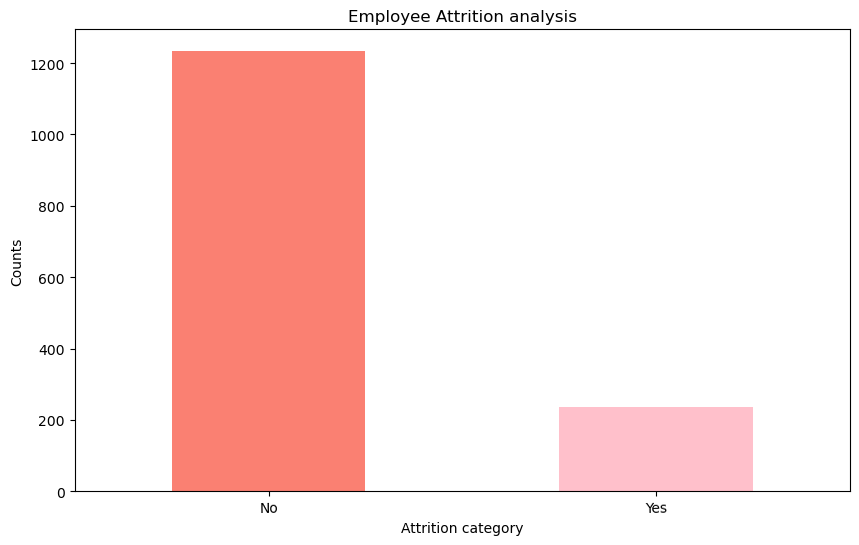

In [12]:
plt.figure(figsize=(10,6))
df['Attrition'].value_counts().plot(kind='bar',color=['salmon','pink']) 
plt.title('Employee Attrition analysis')
plt.xlabel('Attrition category')
plt.ylabel('Counts')
plt.xticks(rotation=1)
pd.DataFrame(df['Attrition'].value_counts())

- Total number of employees in organization is 1470 apart from 237 employees will left their jobs and 1233 employees are happy with their job

## Gender wise count of employees

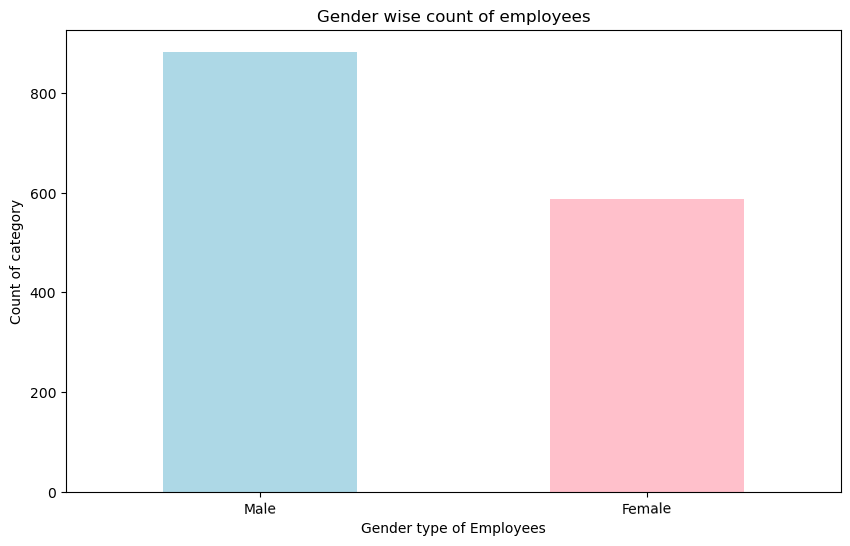

Gender,Male,Female
count,882,588


In [15]:
plt.figure(figsize=(10,6))
df['Gender'].value_counts().plot(kind='bar',color=['lightblue','pink'])
plt.title('Gender wise count of employees')
plt.xlabel('Gender type of Employees')
plt.ylabel('Count of category')
plt.xticks(rotation=1)
plt.show()
pd.DataFrame(df['Gender'].value_counts()).T

- So there are 882 Male and 588 Female Employees in the organiszation

## Attrition distribution with age

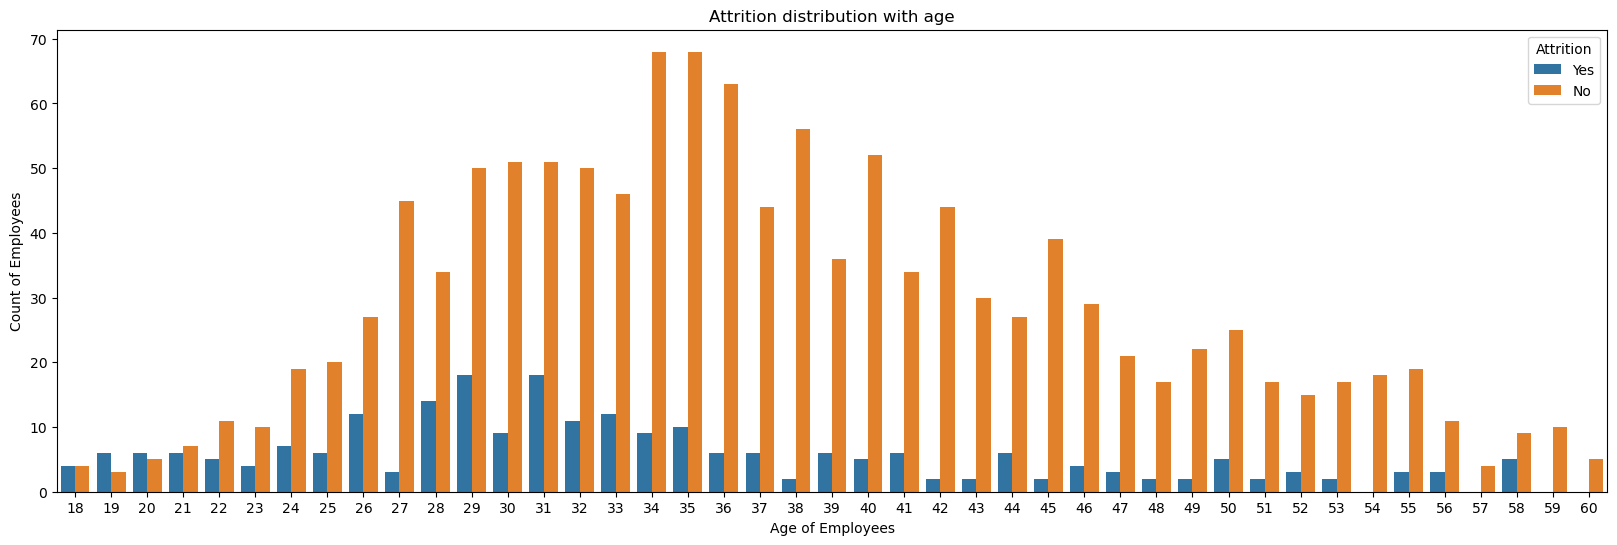

In [18]:
plt.figure(figsize=(20,6))
sns.countplot(data=df, x='Age',hue='Attrition')
plt.title('Attrition distribution with age')
plt.xlabel('Age of Employees')
plt.ylabel('Count of Employees')
plt.show()

- From above two graphs we can see that most of the employees are from age group of 26 to 46
- While average of employee is 37
- While most of the employees are tends to leave the organization in their early stage of career

## Monthly salary distribution

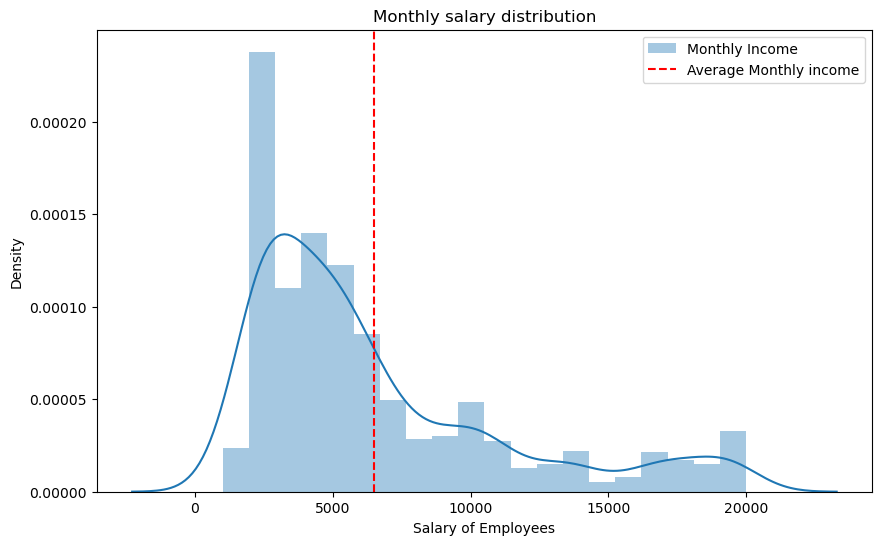

Average Salary of Employees:  6502.931292517007


In [21]:
plt.figure(figsize=(10,6))
sns.distplot(x=df['MonthlyIncome'],label='Monthly Income')
plt.axvline(x=df['MonthlyIncome'].mean(),color='Red',linestyle='--',label='Average Monthly income')
plt.title('Monthly salary distribution')
plt.xlabel('Salary of Employees')
plt.legend()
plt.show()

print('Average Salary of Employees: ',df['MonthlyIncome'].mean())

- Salary distribution shows us that the average salary is around 6500 and most of the employees are from 2500 to 5000 salary range

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


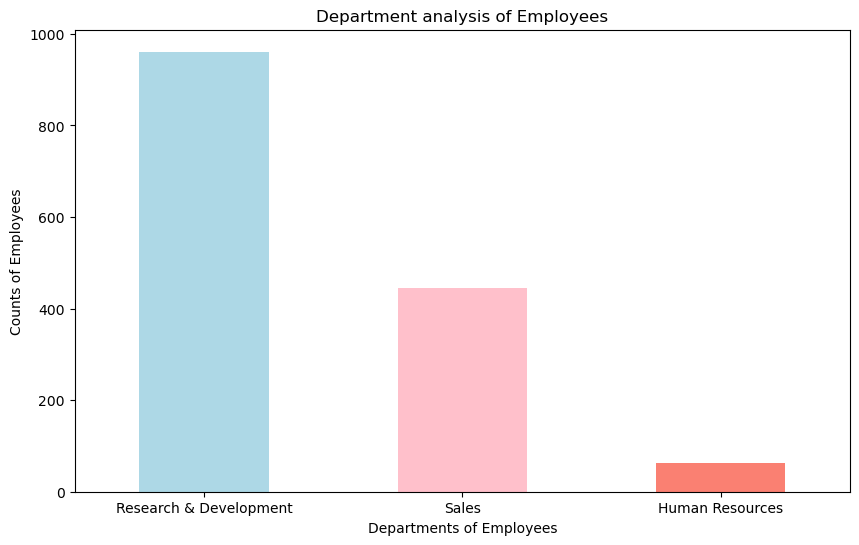

In [23]:
plt.figure(figsize=(10,6))
df['Department'].value_counts().plot(kind='bar',color=['lightblue','pink','salmon'])
plt.title('Department analysis of Employees')
plt.xlabel('Departments of Employees')
plt.ylabel('Counts of Employees')
plt.xticks(rotation=0)
pd.DataFrame(df['Department'].value_counts())

- Research and development department contain maximum count of employee and after that sales then so on.

## Business Travel with attrition

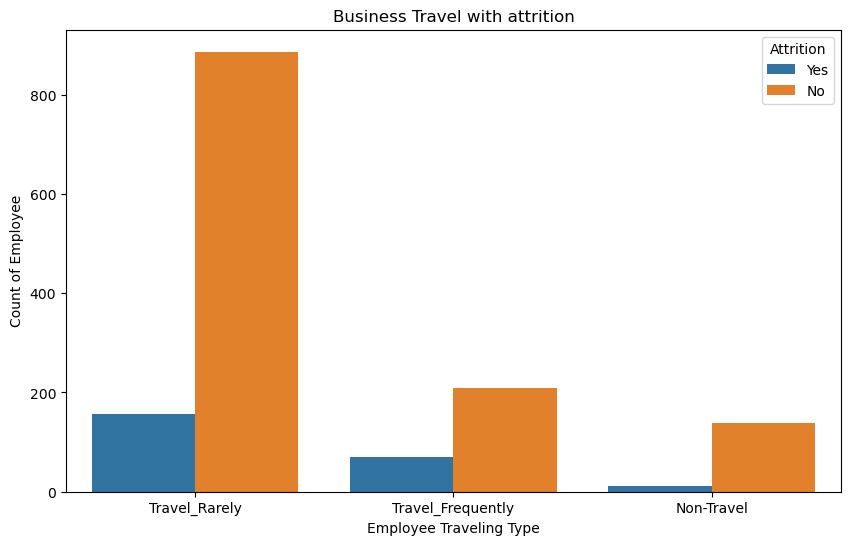

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['BusinessTravel'],hue=df['Attrition'])
plt.title('Business Travel with attrition')
plt.xlabel('Employee Traveling Type')
plt.ylabel('Count of Employee')
plt.show()

In [27]:
crosstab_1 = pd.crosstab(index=df['BusinessTravel'],columns=[df['Attrition'],df['Department']])
crosstab_1

Attrition                      No                               \
Department        Human Resources Research & Development Sales   
BusinessTravel                                                   
Non-Travel                      6                     89    43   
Travel_Frequently               7                    145    56   
Travel_Rarely                  38                    594   255   

Attrition                     Yes                               
Department        Human Resources Research & Development Sales  
BusinessTravel                                                  
Non-Travel                      0                      8     4  
Travel_Frequently               4                     37    28  
Travel_Rarely                   8                     88    60

- The employees have no attrition or the employees happy with their job has maximum traveling count
- So traveling is not a reason for the attrition of the employees.

## Distance From Home and Attrition Rate

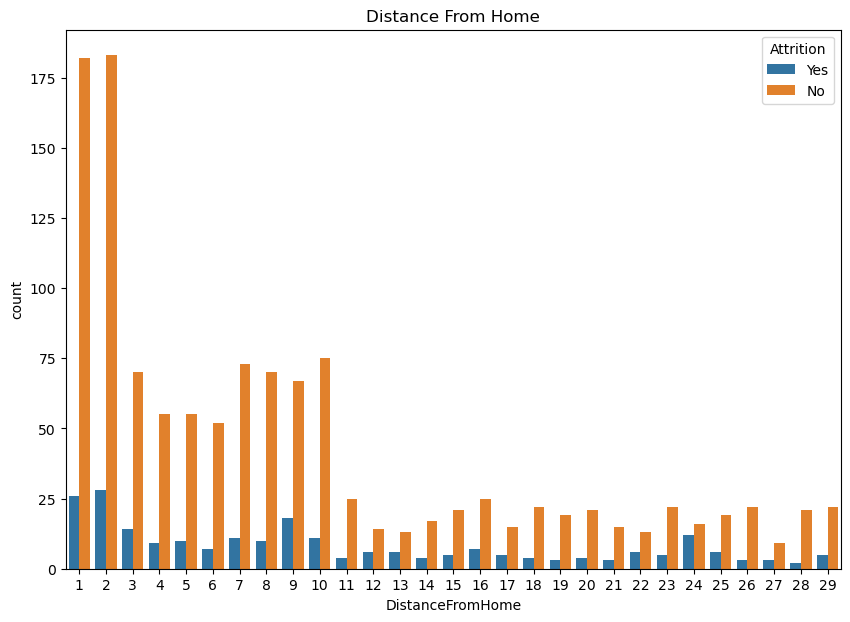

Average distance of employee from their home:  9.19251700680272


In [30]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['DistanceFromHome'],hue=df['Attrition'])
plt.title('Distance From Home')
plt.show()
print("Average distance of employee from their home: ",df['DistanceFromHome'].mean())

- The employees who stay near the company having more attrition rate so distance also not the reason of attrition.

## Environment Satisfaction with Attrition

In [33]:
crosstab_3 = pd.crosstab(index=df['EnvironmentSatisfaction'],columns=[df['Attrition']])
crosstab_3

Attrition,No,Yes
EnvironmentSatisfaction,,
1,212,72
2,244,43
3,391,62
4,386,60


- The employees having low environment satisfaction have high attrition and also we have 60 employees with high environment satisfaction
  and having attrition rate 

## JobSatisfaction and JobLevel Analysis

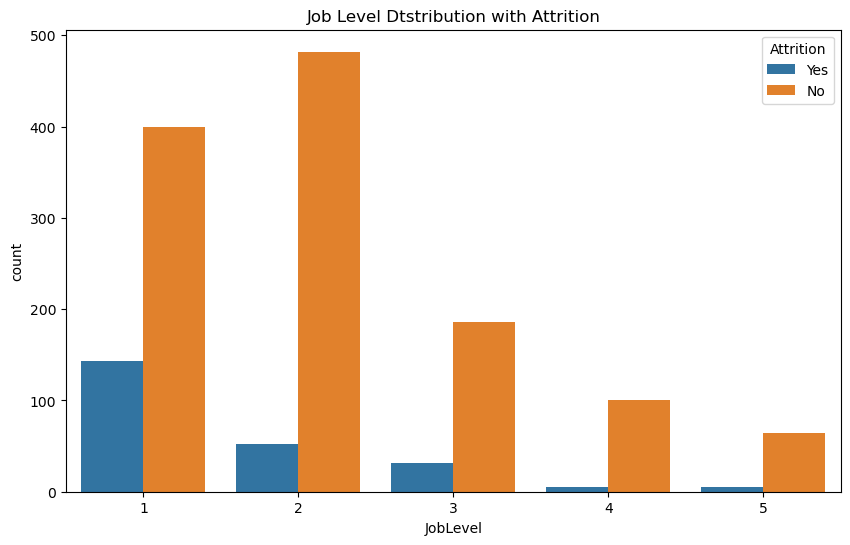

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['JobLevel'],hue=df['Attrition'])
plt.title('Job Level Dtstribution with Attrition')
plt.show()

In [37]:
numerical_data['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [38]:
crosstab = pd.crosstab(index=df['JobLevel'],columns=[df['Attrition']])
crosstab

Attrition,No,Yes
JobLevel,,
1,400,143
2,482,52
3,186,32
4,101,5
5,64,5


- From above analysis we get to know most of empoyees are not promoted yet and that is the reason they are leaving their job at early age.

In [40]:
crosstab = pd.crosstab(index=df['JobLevel'],columns=[df['JobSatisfaction']])
crosstab

JobSatisfaction,1,2,3,4
JobLevel,,,,
1,106,108,162,167
2,102,97,163,172
3,50,37,64,67
4,21,22,28,35
5,10,16,25,18


In [41]:
# Compare Department with jobsatisfaction
crosstab = pd.crosstab(index=categorical_data['Department'],columns=[numerical_data['JobSatisfaction']])
crosstab

JobSatisfaction,1,2,3,4
Department,,,,
Human Resources,11,20,15,17
Research & Development,192,174,300,295
Sales,86,86,127,147


In [42]:
# Compare Department, Jobsatisfaction and Stock Option Level.
crosstab = pd.crosstab(index=categorical_data['Department'],columns=[numerical_data['JobSatisfaction'],numerical_data['StockOptionLevel']])
crosstab

JobSatisfaction          1              2                3                 4  \
StockOptionLevel         0   1   2  3   0   1   2   3    0    1   2   3    0   
Department                                                                     
Human Resources          6   3   0  2   8  10   1   1    5    9   1   0    8   
Research & Development  75  88  20  9  77  68  19  10  134  118  29  19  121   
Sales                   42  31   6  7  35  35  10   6   58   48  18   3   62   

JobSatisfaction                      
StockOptionLevel          1   2   3  
Department                           
Human Resources           6   1   2  
Research & Development  119  35  20  
Sales                    61  18   6

In [43]:
# Encoding technic using replce funtion on Target column
df['Attrition'] = df['Attrition'].replace({'Yes':1,'No':0})

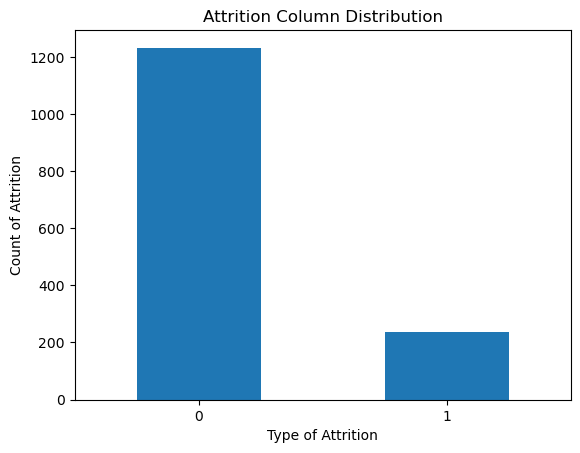

Attrition
0    1233
1     237
Name: count, dtype: int64

In [44]:
df['Attrition'].value_counts().plot(kind='bar')
plt.title('Attrition Column Distribution')
plt.xlabel('Type of Attrition')
plt.ylabel('Count of Attrition')
plt.xticks(rotation=1)
plt.show()
df['Attrition'].value_counts()

- We can see the dependent variable or the target column is imbalanced so we need to balance it using smote technique

In [46]:
categorical_data.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

## Encoding Technique

In [48]:
# Now we perform Encoding on independent columns using labelencoder
le = LabelEncoder()
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['OverTime'] = le.fit_transform(df['OverTime'])

In [49]:
df.sample(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
6,59,0,2,1,3,3,3,3,0,4,...,4,1,3,12,3,2,1,0,0,0
1237,32,1,2,2,1,2,1,1,1,1,...,3,2,0,10,2,3,0,0,0,0
795,37,0,2,2,10,4,1,4,0,2,...,3,3,3,8,5,3,1,0,0,0
321,31,0,2,2,7,3,2,4,1,3,...,3,4,3,13,3,3,7,7,1,7
152,53,0,2,2,6,2,2,2,1,3,...,4,4,1,13,3,1,7,7,4,5


## Data Splitting

In [51]:
# Split the data into features and target
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state=2)

In [53]:
# Perform Scaling Technique
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [54]:
# Checked the data is scaled
X_train.min(),X_test.max()

(0.0, 1.0810810810810811)

In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=2)
X_train,y_train = smote.fit_resample(X_train,y_train)

## Model Bulding 

In [57]:
# Import Machile Learning Classification algorithms
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.svm import SVC
sv = SVC()

In [58]:
# Creating the function to test the model
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))

- Here we created a function to check which Machine Learning Algorithm will be the best fit for our model. 
- We will select the one with highest accuracy.

## LogisticRegression

In [61]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       370
           1       0.38      0.65      0.48        71

    accuracy                           0.78       441
   macro avg       0.65      0.72      0.67       441
weighted avg       0.84      0.78      0.80       441



## KNeighborsClassifier

In [63]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       370
           1       0.29      0.59      0.39        71

    accuracy                           0.70       441
   macro avg       0.59      0.65      0.59       441
weighted avg       0.80      0.70      0.73       441



## DecisionTreeClassifier

In [65]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       370
           1       0.39      0.45      0.42        71

    accuracy                           0.80       441
   macro avg       0.64      0.66      0.65       441
weighted avg       0.81      0.80      0.80       441



## Support vector classifier

In [67]:
mymodel(sv)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       370
           1       0.40      0.46      0.43        71

    accuracy                           0.80       441
   macro avg       0.65      0.67      0.66       441
weighted avg       0.81      0.80      0.81       441



## RandomForestClassifier

In [69]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       370
           1       0.66      0.27      0.38        71

    accuracy                           0.86       441
   macro avg       0.76      0.62      0.65       441
weighted avg       0.84      0.86      0.83       441



- RandomForestClassifier gives the highest accuracy so this is the best suit model

In [71]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

1.0
0.8594104308390023


# Deep Learning

### ANN Technique

In [74]:
# Importing Deep Learning Library
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [75]:
X.shape

(1470, 27)

In [79]:
ann_model = Sequential()
ann_model.add(Dense(128,activation='relu',input_dim = 27))
ann_model.add(Dense(64,activation='relu'))
ann_model.add(Dense(32,activation='relu'))
ann_model.add(Dense(16,activation='relu'))
ann_model.add(Dense(1,activation='sigmoid'))

In [81]:
ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [83]:
ann_model.fit(X_train,y_train,epochs=1000,batch_size=32,validation_split=0.3)

Epoch 1/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6238 - loss: 0.6562 - val_accuracy: 0.0058 - val_loss: 1.1334
Epoch 2/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7725 - loss: 0.4719 - val_accuracy: 0.7027 - val_loss: 0.6566
Epoch 3/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8182 - loss: 0.4340 - val_accuracy: 0.7336 - val_loss: 0.5858
Epoch 4/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8398 - loss: 0.3820 - val_accuracy: 0.6139 - val_loss: 0.7866
Epoch 5/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8398 - loss: 0.3692 - val_accuracy: 0.7587 - val_loss: 0.5529
Epoch 6/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8552 - loss: 0.3542 - val_accuracy: 0.5946 - val_loss: 0.8382
Epoch 7/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8417 - loss: 0.3591 - val_accuracy: 0.6236 - val_loss: 0.7738
Epoch 8/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8668 - loss: 0.3202 - val_accuracy: 0.

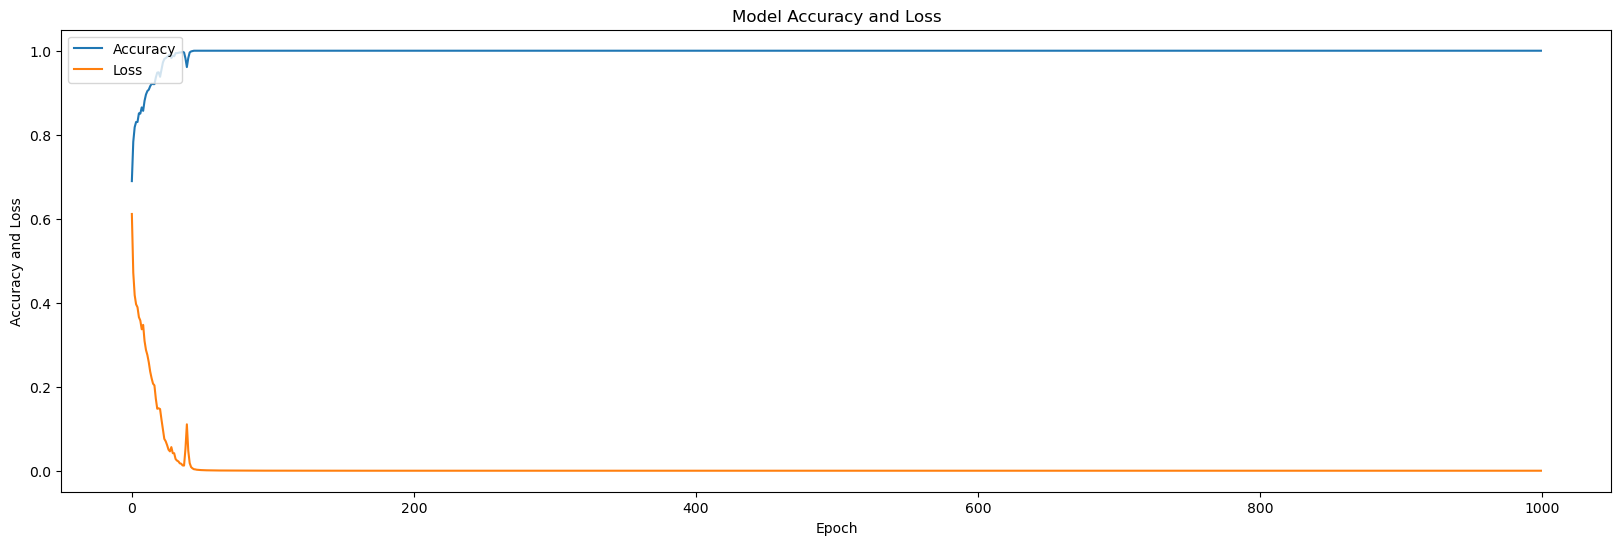

In [84]:
model_history = ann_model.history.history

plt.figure(figsize = (20,6))
plt.plot(model_history['accuracy'])
plt.plot(model_history['loss'])
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Loss'],loc = 'upper left')
plt.show()

In [85]:
y_pred_ann = ann_model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5,1,0)
print('Classification Report :',classification_report(y_test,y_pred_ann))
print('Accuracy Score :',accuracy_score(y_test,y_pred_ann))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.94      0.91       370
           1       0.55      0.38      0.45        71

    accuracy                           0.85       441
   macro avg       0.72      0.66      0.68       441
weighted avg       0.83      0.85      0.84       441

Accuracy Score : 0.8503401360544217


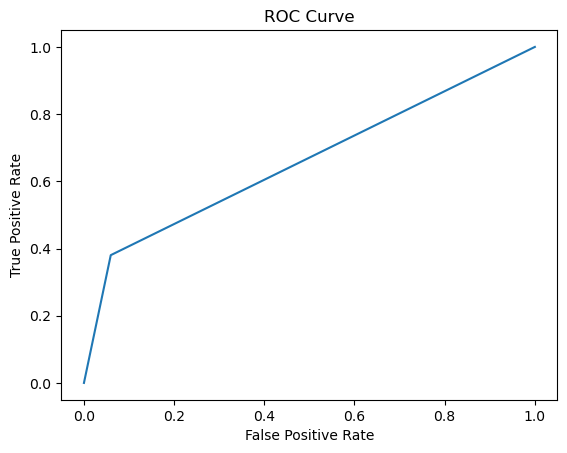

In [86]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,thresholds = roc_curve(y_test,y_pred_ann)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Thank You ...